In [54]:
import numpy as np
import cv2
from PIL import ImageGrab
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
learning_rate = 0.01
num_epochs = 1
batch_size = 2
num_batches = 10
num_classes = 2

In [3]:
def plotImg(imgs):
    fig = plt.figure()
    for i in range(len(imgs)):
        fig.add_subplot(1, len(imgs), i + 1)
        plt.imshow(imgs[i])
        plt.axis('off')

(40, 50, 4) (40, 50, 4) (40, 50) (40, 50)


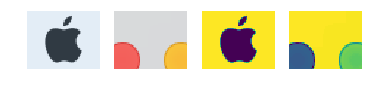

In [4]:
p1 = ImageGrab.grab(bbox=(30,0,80,40))
p2 = ImageGrab.grab(bbox=(30,50,80,90))
p3 = cv2.cvtColor(np.array(p1), cv2.COLOR_RGBA2GRAY)
p4 = cv2.cvtColor(np.array(p2), cv2.COLOR_RGBA2GRAY)
print(np.shape(p1), np.shape(p2), np.shape(p3), np.shape(p4))
plotImg([p1, p2, p3, p4])

In [5]:
# initialize dataset
p1, p2 = p3.reshape(-1,), p4.reshape(-1,)
class pair():
    a = b = None
class data():
    index = 0
    entry = pair()
    def next_batch(self, batch_size):
        i = 0
        res1 = []
        res2 = []
        while(i < batch_size):
            cur = (self.index + i) % len(self.entry.a)
            res1.append(self.entry.a[cur])
            res2.append(self.entry.b[cur])
            i += 1
        self.index = (self.index + batch_size) % len(self.entry.a)
        return res1, res2
class dataset():
    train = data()
    test = data()
    validation = data()
dataset.train.entry.a = [p1, p2]
dataset.train.entry.b = [0, 1]

In [6]:
# Placeholders for MNIST images
image_holder = tf.placeholder(tf.float32, [None, 2000])
label_holder = tf.placeholder(tf.float32, [None, 2])

In [7]:
# Variables
m = tf.Variable(tf.zeros([2000, num_classes]))
b = tf.Variable(tf.zeros([num_classes]))

In [8]:
# Compute loss
logits=tf.matmul(image_holder, m) + b
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = label_holder)
loss = tf.reduce_mean(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [9]:
# Compute accuracy
prediction = tf.matmul(image_holder, m) + b
predictions = tf.argmax(prediction, 1)
correct_pred = tf.equal(predictions, tf.argmax(label_holder, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [10]:
# Create optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [11]:
# Initialize variables
init = tf.global_variables_initializer()
# Launch session
sess = tf.Session()
sess.run(init)

In [12]:
# Loop over epochs
for epoch in range(num_epochs):
    # Loop over batches
    for batch in range(num_batches):
        image_batch, label_batch = dataset.train.next_batch(batch_size)
        _, lossVal, accu = sess.run([optimizer, loss, accuracy], \
        feed_dict={image_holder: image_batch, label_holder: \
        [np.eye(2)[label_batch[i]] for i in range(batch_size)]})
        # Display the final loss
        print('loss: ', lossVal, 'accuracy: ', accu)

loss:  0.6931472 accuracy:  0.5
loss:  0.0 accuracy:  1.0
loss:  0.0 accuracy:  1.0
loss:  0.0 accuracy:  1.0
loss:  0.0 accuracy:  1.0
loss:  0.0 accuracy:  1.0
loss:  0.0 accuracy:  1.0
loss:  0.0 accuracy:  1.0
loss:  0.0 accuracy:  1.0
loss:  0.0 accuracy:  1.0


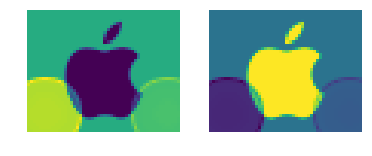

In [33]:
a = np.reshape(sess.run(m)[:,0], [40, -1])
b = np.reshape(sess.run(m)[:,1], [40, -1])
plotImg([a,b])

In [52]:
def test(n):
    res = []
    space = 5 # distance of picking a new picture
    for i in range(n):
        p = ImageGrab.grab(bbox=(30,i*space,80,40 + i * space))
        p = cv2.cvtColor(np.array(p), cv2.COLOR_RGBA2GRAY)
        res.append(p)
    plotImg(res)
    res = np.reshape(res, [n, -1, ])
    evaluate = sess.run(prediction, feed_dict = {image_holder: res})
    print(evaluate)
    print(np.argmax(evaluate, 1))

[[ 19639.63   -19639.63  ]
 [  9785.139   -9785.139 ]
 [  1895.2593  -1895.2593]
 [ -3386.4219   3386.4219]
 [ -9947.582    9947.582 ]
 [-11142.633   11142.633 ]
 [-10891.588   10891.588 ]
 [-13389.125   13389.125 ]
 [-15165.464   15165.464 ]
 [-17231.148   17231.148 ]]
[0 0 0 1 1 1 1 1 1 1]


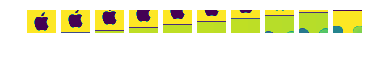

In [53]:
test(10)

[[ 19639.643 -19639.643]
 [-17940.797  17940.797]]


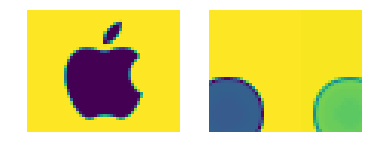

In [44]:
p1 = ImageGrab.grab(bbox=(30,0,80,40))
p2 = ImageGrab.grab(bbox=(30,50,80,90))
p1 = cv2.cvtColor(np.array(p1), cv2.COLOR_RGBA2GRAY)
p2 = cv2.cvtColor(np.array(p2), cv2.COLOR_RGBA2GRAY)
plotImg([p1, p2])
p1 = p1.reshape(-1,)
p2 = p2.reshape(-1,)
print(sess.run(prediction, feed_dict = {image_holder: [p1, p2]}))